# Pradhan Mantri Kaushal Vikas Yojana

Objective - To Analyze the scheme Pradhan Mantri Kaushal Vikas Yojana launched by the Indian Government on 15th of july,2015.

### Trying to find the answers of the following questions -

1)How PMKVY performed in different states and districts of India.<br>
2)Whether scheme turned out to be a success or a failure overall.<br>
3)Ratio among Enrolled, Trained, Assessed, Certified, Placed Students. etc.

## About the Dataset

1) Date Till - Date upto which data is taken.Here Data is taken till 21-04-2022.<br>
2) Scheme - Divided into into PMKVY 2.0(2016-2020) and PMKVY 3.0(2020-2022).<br>
3) Component - Its having two components CSCM(Centrally Sponsored Centrally Managed) and CSSM(Centrally Sponsored State Managed)components.<br>
4) Training Type - It includes three types of training namely : Recognition of Prior Learning (RPL), Short term training (STT), Special Projects (SP).<br>
5) TCState and TCDistrict - Consists of 8 Union Territories,28 States and 720 Districts of India.<br>
6) Enrolled - How many students enrolled in the PMKVY scheme.<br>
7) Trained - How many students got trained in the PMKVY scheme.<br>
8) Assessed - How many students got assessed  in the PMKVY scheme.<br>
9) Certified - How many students got certified  in the PMKVY scheme.<br>
10) Reported Placed - How many students got placed  in the PMKVY scheme.<br>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as p9
from plotnine import ggplot, aes, geom_line
from plotnine import *

In [4]:
!pip install plotnine

In [5]:
df = pd.read_csv('C:\\fda project\\pmkvy_table.csv')

In [6]:
df8 = pd.read_csv('C:\\fda project\\gender_wise_enrolled_placed.csv')

In [7]:
df9 = pd.read_csv('C:\\fda project\\gender_wise_salary.csv')

In [8]:
df.head()

,Data Till,Scheme,Component,TrainingType,TCState,TCDistrict,Enrolled,Trained,Assessed,Certified,ReportedPlaced
0,21-04-2022,PMKVY 2.0,CSCM,RPL,Andaman And Nicobar Islands,Nicobars,46,46,46,46,0
1,21-04-2022,PMKVY 2.0,CSCM,RPL,Andaman And Nicobar Islands,South Andamans,10,10,6,6,0
2,21-04-2022,PMKVY 2.0,CSCM,STT,Andaman And Nicobar Islands,Nicobars,120,120,120,108,0
3,21-04-2022,PMKVY 2.0,CSSM,STT,Andaman And Nicobar Islands,Nicobars,156,156,78,57,0
4,21-04-2022,PMKVY 2.0,CSCM,STT,Andaman And Nicobar Islands,North And Middle Andaman,1041,870,861,839,124


In [9]:
df8.head()

,TCState,EnrolledFemale,EnrolledMale,EnrolledTransgender,ReportedPlaced_Female,ReportedPlaced_Male,ReportedPlaced_Transgender,TotalEnrolled,TotalReported_Placed
0,Andaman and Nicobar Islands,1821,2160,0,113,11,0,3981,124
1,Andhra Pradesh,149322,191489,10,47241,45460,3,340821,92704
2,Arunachal Pradesh,50993,34785,18,7071,4438,1,85796,11510
3,Assam,422171,281506,197,34242,24789,5,703874,59036
4,Bihar,196759,369869,7,44508,68559,0,566635,113067


In [10]:
df9.head()

,TCState,Female_Salary,Male_Salary,Transgender_Salary
0,Andaman and Nicobar Islands,9858,10000,0
1,Andhra Pradesh,8310,9107,9416
2,Arunachal Pradesh,10145,10396,8849
3,Assam,7330,7718,7000
4,Bihar,7869,8277,7543


Checking for null values-

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5138 entries, 0 to 5137
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Data Till       5138 non-null   object
 1   Scheme          5138 non-null   object
 2   Component       5138 non-null   object
 3   TrainingType    5138 non-null   object
 4   TCState         5138 non-null   object
 5   TCDistrict      5138 non-null   object
 6   Enrolled        5138 non-null   int64 
 7   Trained         5138 non-null   int64 
 8   Assessed        5138 non-null   int64 
 9   Certified       5138 non-null   int64 
 10  ReportedPlaced  5138 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 441.7+ KB


In [12]:
df.isnull().sum()

Data Till         0
Scheme            0
Component         0
TrainingType      0
TCState           0
TCDistrict        0
Enrolled          0
Trained           0
Assessed          0
Certified         0
ReportedPlaced    0
dtype: int64

**Thus,we dont have any null value in our data**

In [13]:
df.describe()

,Enrolled,Trained,Assessed,Certified,ReportedPlaced
count,5138.000000,5138.000000,5138.00000,5138.000000,5138.000000
mean,2386.846049,2247.815492,2009.13624,1829.335928,418.207279
std,6918.405597,6760.469504,6111.68478,5800.133446,1397.266215
min,0.000000,0.000000,0.00000,0.000000,0.000000
25%,132.250000,120.000000,85.25000,50.000000,0.000000
50%,374.500000,259.000000,198.00000,151.000000,0.000000
75%,1710.750000,1568.750000,1379.25000,1222.000000,80.000000
max,171252.000000,168349.000000,155000.00000,148641.000000,21682.000000


In [14]:
df['Data Till'].value_counts()

21-04-2022    5138
Name: Data Till, dtype: int64

In [15]:
for column in df.columns:
     print("\n" + column)
     print(df[column].value_counts())


Data Till
21-04-2022    5138
Name: Data Till, dtype: int64

Scheme
PMKVY 3.0    2699
PMKVY 2.0    2439
Name: Scheme, dtype: int64

Component
CSCM    3414
CSSM    1724
Name: Component, dtype: int64

TrainingType
STT    2516
RPL    1720
SP      902
Name: TrainingType, dtype: int64

TCState
Uttar Pradesh                                   577
Madhya Pradesh                                  344
Maharashtra                                     302
Tamil Nadu                                      275
Bihar                                           260
Karnataka                                       247
Rajasthan                                       242
Assam                                           236
Gujarat                                         232
Odisha                                          206
Telangana                                       200
Punjab                                          200
Haryana                                         166
West Bengal                       

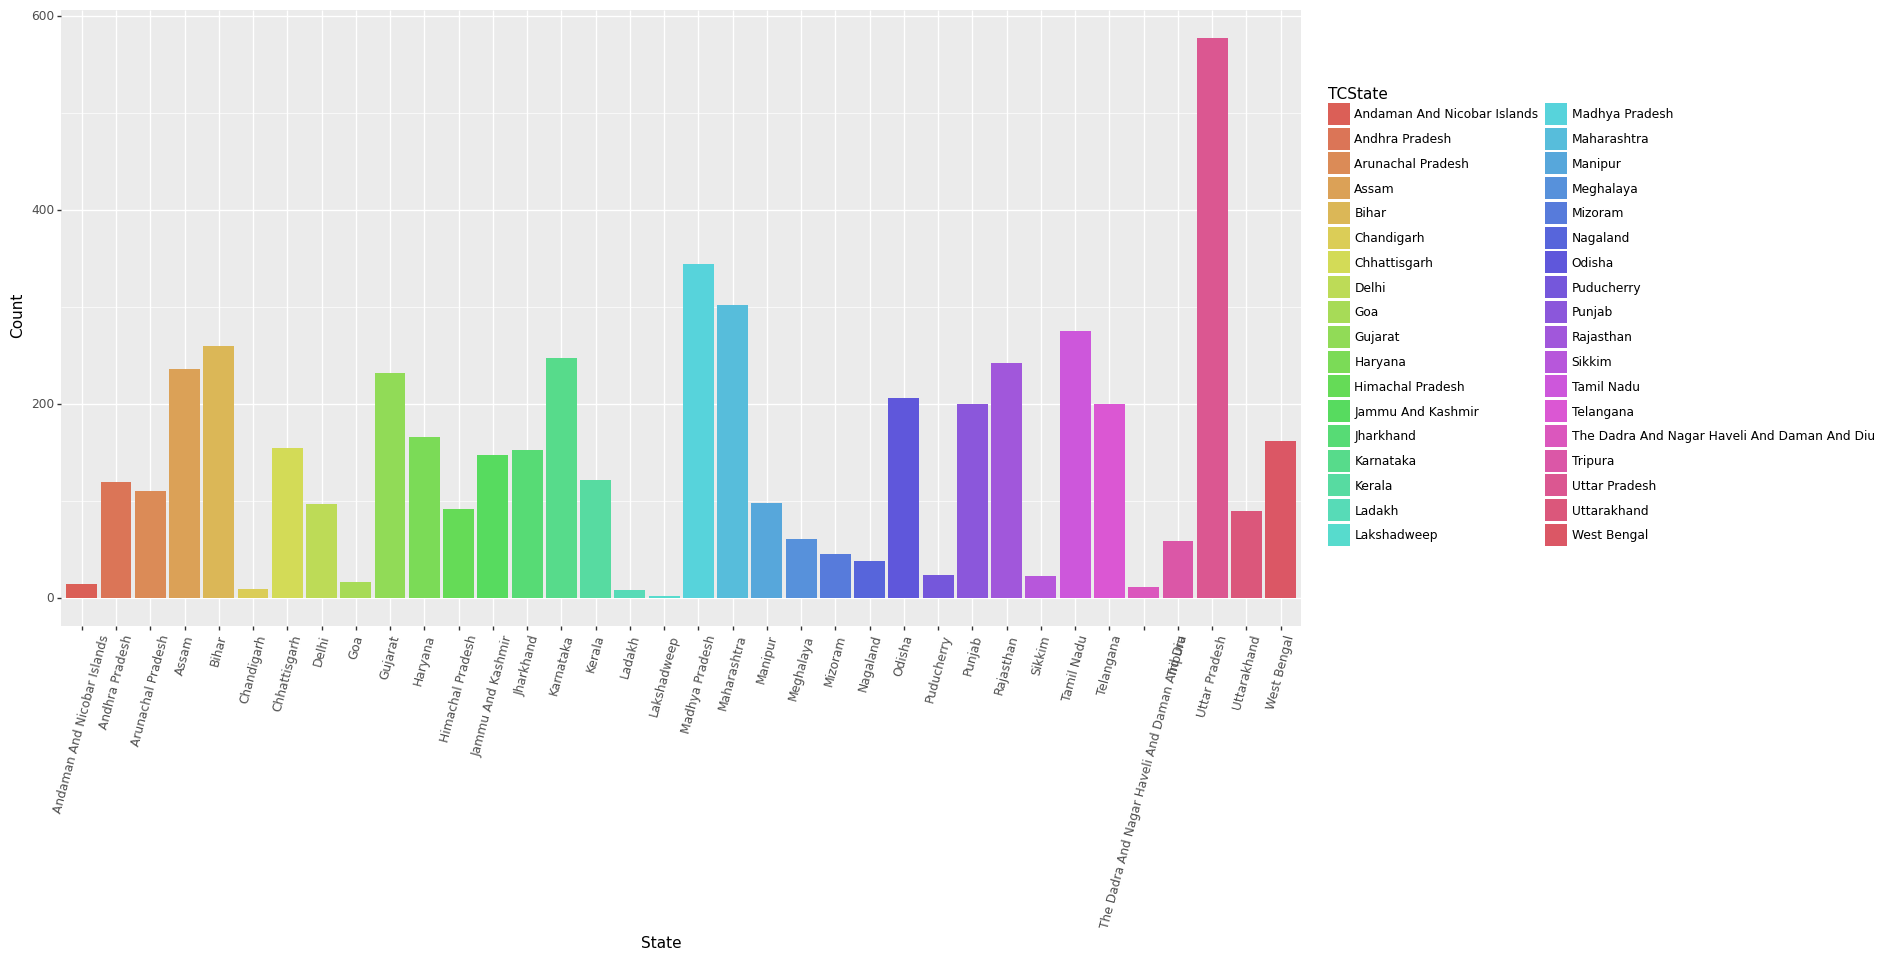

<ggplot: (93130841299)>

In [47]:
ggplot(df, aes(x='TCState',fill='TCState')) + \
    geom_bar() + \
    xlab('State') + \
    ylab('Count') + theme(axis_text_x = element_text(angle = 75)) + theme(figure_size=(16, 8))

**Uttar Pradesh has Maximum Training Centres followed by Madhya Pradesh And Least being in Lakshwadeep.**

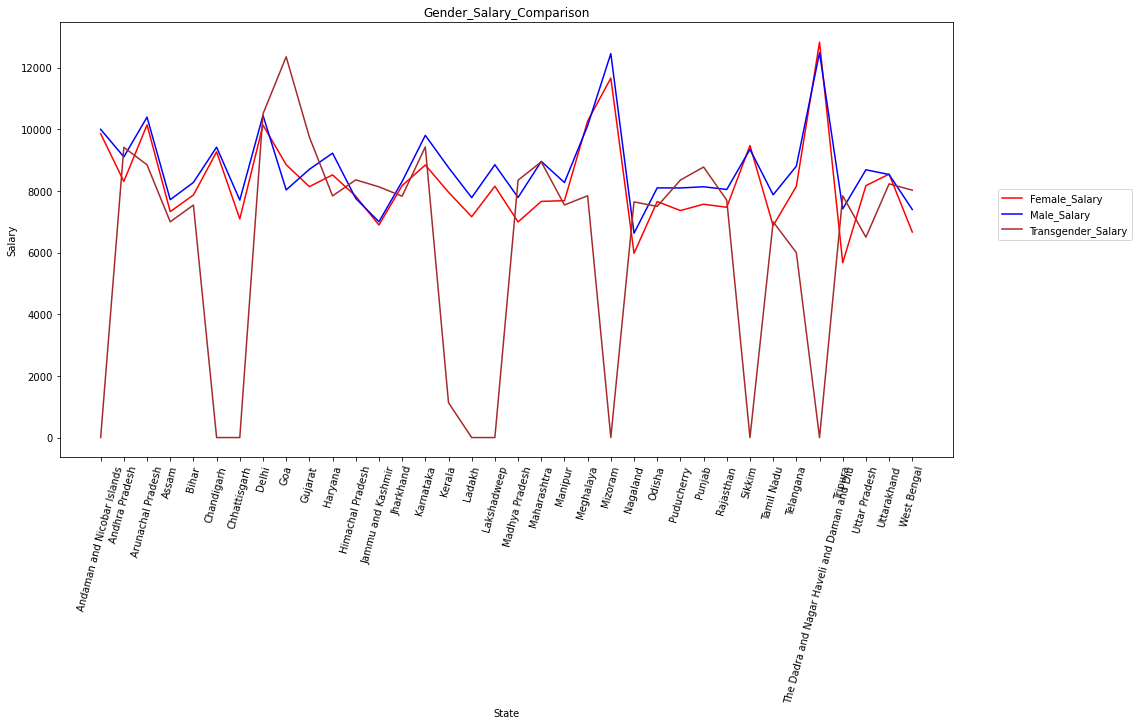

,Female_Salary,Male_Salary,Transgender_Salary
TCState,,,
Andaman and Nicobar Islands,9858.0,10000.0,0.0
Andhra Pradesh,8310.0,9107.0,9416.0
Arunachal Pradesh,10145.0,10396.0,8849.0
Assam,7330.0,7718.0,7000.0
Bihar,7869.0,8277.0,7543.0
Chandigarh,9270.0,9421.0,0.0
Chhattisgarh,7093.0,7704.0,0.0
Delhi,10139.0,10454.0,10500.0
Goa,8853.0,8035.0,12354.0


In [17]:
plt.rcParams['figure.figsize'] = [16, 8]
ax=df9.plot(kind='line',color=['red','blue','brown'])
plt.title('Gender_Salary_Comparison')
plt.xlabel('State')
plt.ylabel('Salary')

plt.xticks(rotation = 75)
ticks = df9.index.tolist()



plt.xticks(ticks,df9.TCState)
ax.legend(loc=(1.05,0.5))


plt.show()


df9.groupby('TCState').mean()[['Female_Salary','Male_Salary','Transgender_Salary']]

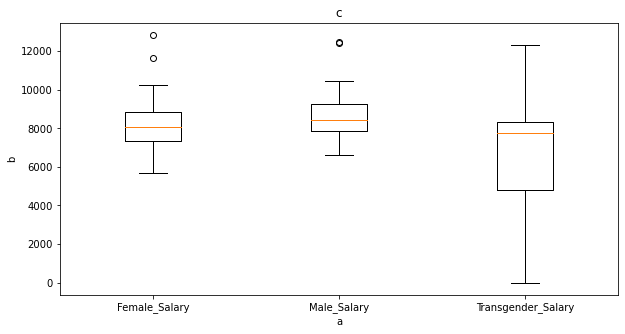

In [49]:
Female_Salary = df9['Female_Salary']
Male_Salary = df9 ['Male_Salary']
Transgender_Salary = df9 ['Transgender_Salary']

columns = [Female_Salary,Male_Salary,Transgender_Salary]


fig, ax = plt.subplots()
ax.boxplot(columns)
plt.xticks([1, 2, 3], ['Female_Salary','Male_Salary','Transgender_Salary'])
plt.xlabel("a")
plt.ylabel("b")
plt.title("c")
fig.set_size_inches(10, 5)
plt.show()

**by visualizing trends of line we can predict that average salary of Men is greater than women and Transgender.**

TCState
Delhi                                           4307.0
Rajasthan                                       4085.0
Maharashtra                                     3781.0
Haryana                                         3566.0
Uttar Pradesh                                   3025.0
Assam                                           2983.0
West Bengal                                     2936.0
Andhra Pradesh                                  2864.0
Chandigarh                                      2633.0
Odisha                                          2518.0
Tamil Nadu                                      2248.0
Madhya Pradesh                                  2242.0
Uttarakhand                                     2184.0
Bihar                                           2179.0
Tripura                                         2162.0
Kerala                                          2126.0
Jammu And Kashmir                               2110.0
Karnataka                                       1900.0
Pu

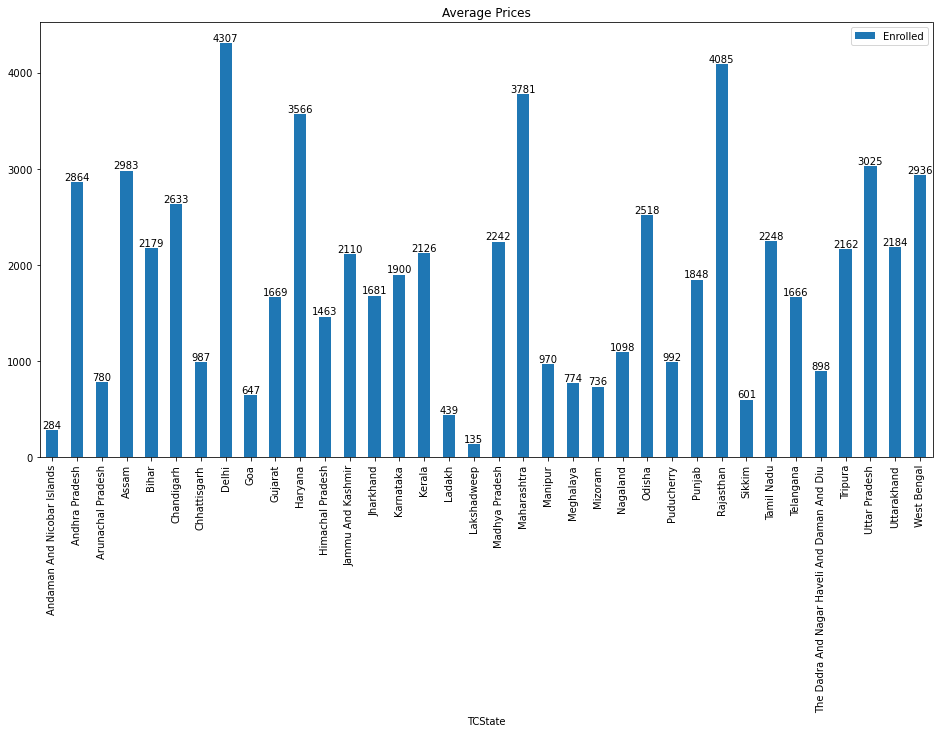

In [19]:
plt.figure(figsize=(16,8))
enrolled_per_state_df = df.groupby("TCState").agg(np.mean)
enrolled_per_state = enrolled_per_state_df['Enrolled']
ax = enrolled_per_state.plot(kind = "bar", y = "mean", legend =True,
            title = "Average Prices")

for i in ax.containers:
    ax.bar_label(i,fmt='%.0f')

print(df.groupby('TCState').mean().round()['Enrolled'].sort_values(ascending=False))

**Most number of average students enrolled in Delhi followed by Rajasthan and least being in Lakshwadeep**

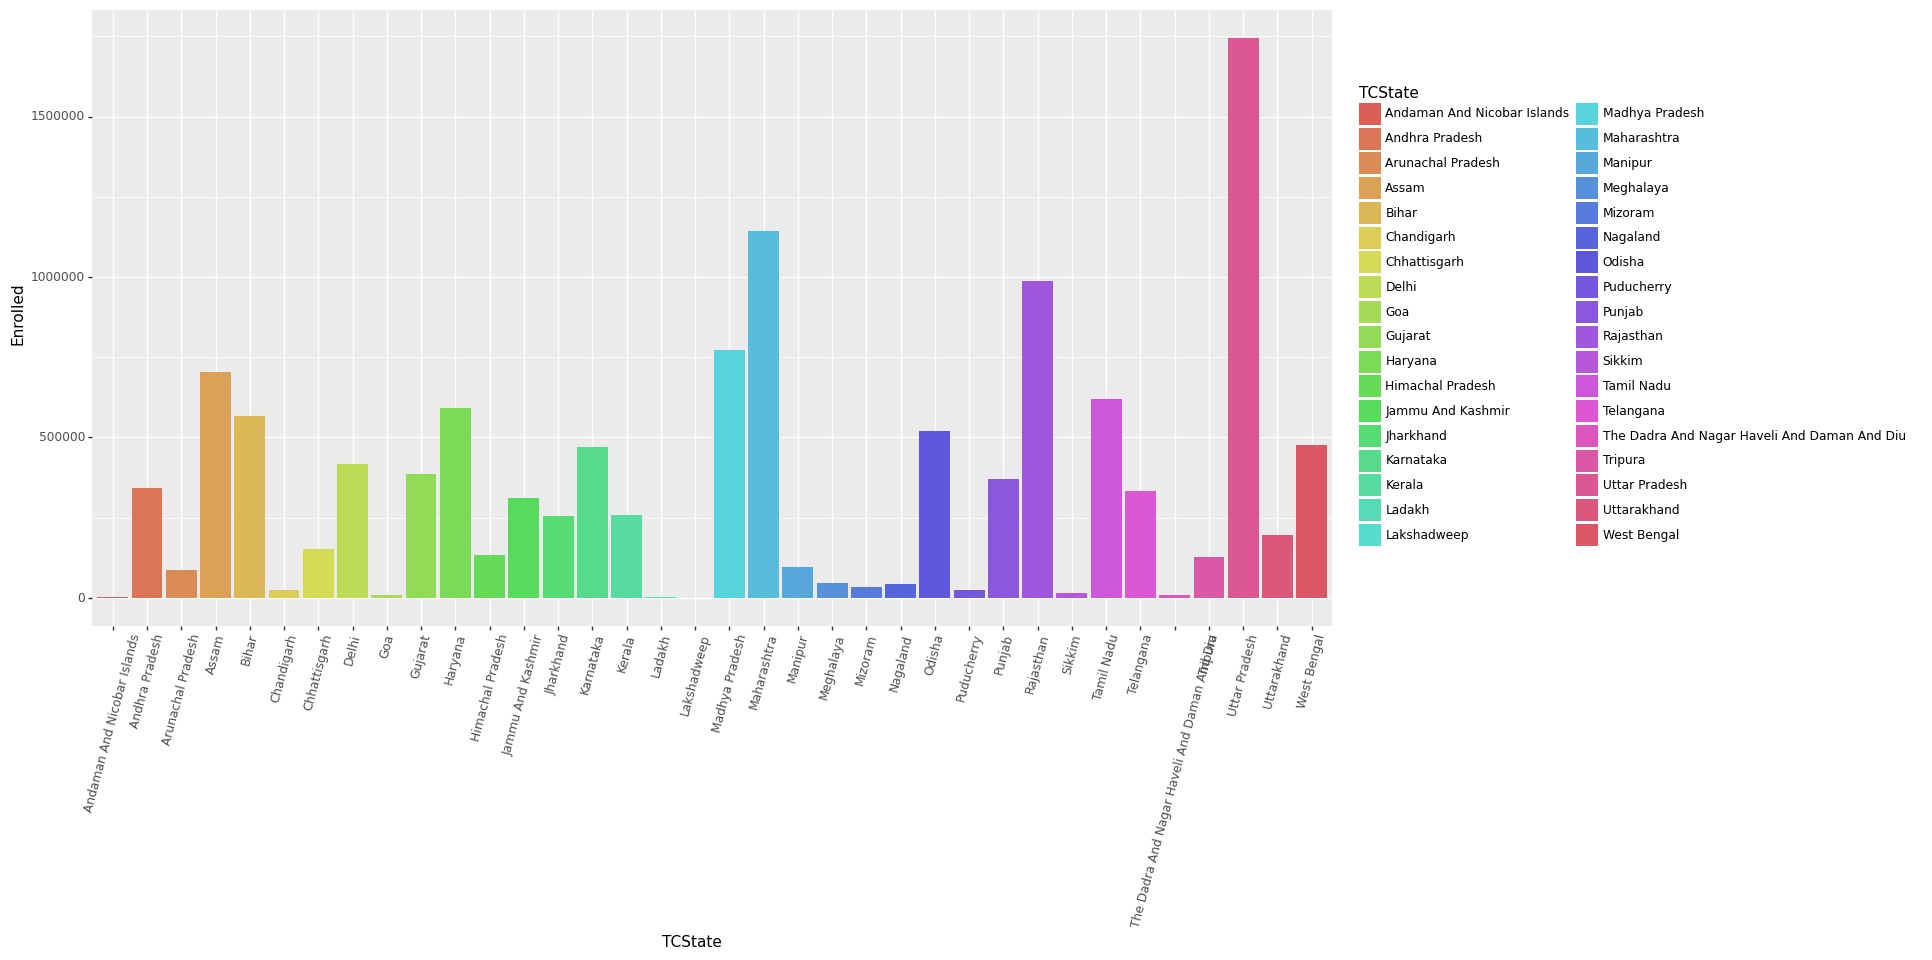

<ggplot: (93131429675)>

In [57]:
ggplot(df,aes(fill='TCState')) +\
geom_bar(mapping=aes(x="TCState", y="Enrolled"), stat="identity")+\
theme(axis_text_x = element_text(angle = 75)) + theme(figure_size=(16, 8))

#print(df.groupby('TCState').sum().round()['Enrolled'].sort_values(ascending=False))

**Maximum students enrolled in Uttar Pradesh and minimum in Lakshwadeep.**

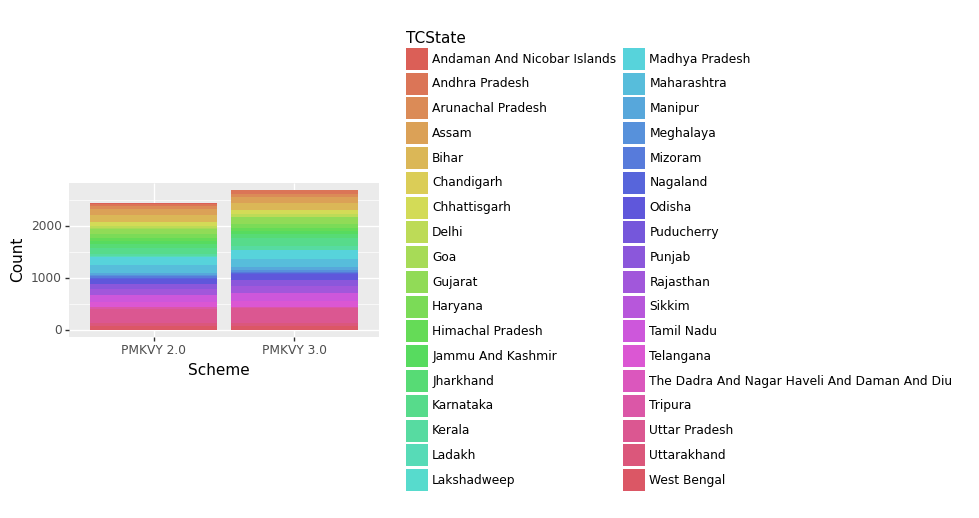

<ggplot: (93129256150)>

In [60]:
ggplot(df, aes(x='Scheme',fill='TCState')) +geom_bar() + xlab('Scheme') + ylab('Count')+theme(figure_size=(4, 2))

**In our data mostly PMKVY 3.0 is covered**

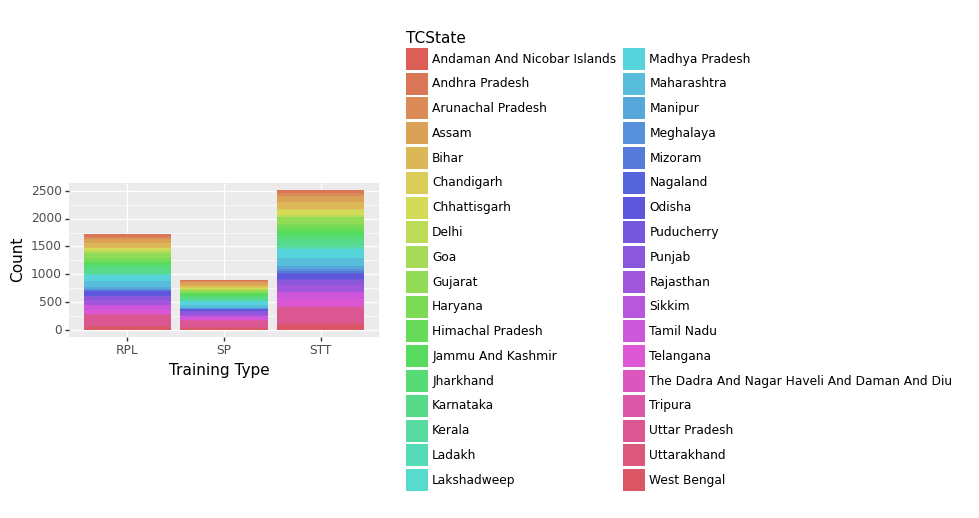

<ggplot: (93131355639)>

In [61]:
ggplot(df, aes(x='TrainingType',fill='TCState')) +geom_bar() + xlab('Training Type') + ylab('Count')+theme(figure_size=(4, 2))

**Mostly STT is the Training type done by the students least being SP.**

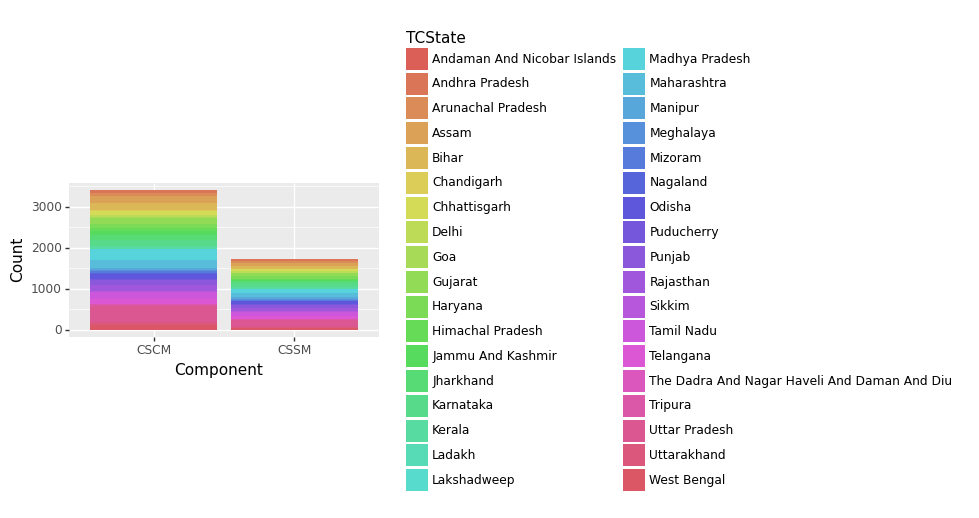

<ggplot: (93133352087)>

In [62]:
ggplot(df, aes(x='Component',fill='TCState')) +geom_bar() + xlab('Component') + ylab('Count')+theme(figure_size=(4, 2))

**Mostly CSCM Component is implemented.**

array([<AxesSubplot:title={'center':'CSCM'}>,
       <AxesSubplot:title={'center':'CSSM'}>, <AxesSubplot:>],
      dtype=object)

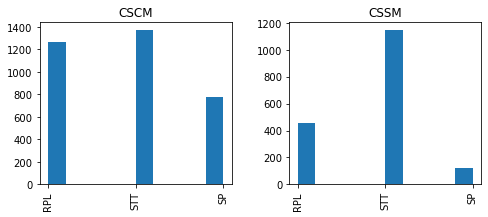

In [24]:
df.hist(column='TrainingType',by='Component',layout=(1,3),figsize=(12,3),sharex=True)


**Number of Training centres per district is maximum in Delhi, Lowest in Lakshadweep.**

In [25]:
df['t/e'] = 100 * df['Trained'] / df['Enrolled']

In [26]:
df[df['t/e'].isna()]

,Data Till,Scheme,Component,TrainingType,TCState,TCDistrict,Enrolled,Trained,Assessed,Certified,ReportedPlaced,t/e
704,21-04-2022,PMKVY 3.0,CSSM,STT,Bihar,Lakhisarai,0,0,0,0,0,NaN


In [27]:
df['t/e'] =df['t/e'].fillna(0)

In [28]:
df['t/e'] = df['t/e'].apply(np.int64)

In [29]:
df.head()

,Data Till,Scheme,Component,TrainingType,TCState,TCDistrict,Enrolled,Trained,Assessed,Certified,ReportedPlaced,t/e
0,21-04-2022,PMKVY 2.0,CSCM,RPL,Andaman And Nicobar Islands,Nicobars,46,46,46,46,0,100
1,21-04-2022,PMKVY 2.0,CSCM,RPL,Andaman And Nicobar Islands,South Andamans,10,10,6,6,0,100
2,21-04-2022,PMKVY 2.0,CSCM,STT,Andaman And Nicobar Islands,Nicobars,120,120,120,108,0,100
3,21-04-2022,PMKVY 2.0,CSSM,STT,Andaman And Nicobar Islands,Nicobars,156,156,78,57,0,100
4,21-04-2022,PMKVY 2.0,CSCM,STT,Andaman And Nicobar Islands,North And Middle Andaman,1041,870,861,839,124,83


TCState
Lakshadweep                                     100.0
The Dadra And Nagar Haveli And Daman And Diu     98.0
Arunachal Pradesh                                92.0
Manipur                                          91.0
Meghalaya                                        91.0
Sikkim                                           91.0
Tamil Nadu                                       90.0
Uttarakhand                                      90.0
Kerala                                           90.0
Rajasthan                                        89.0
Karnataka                                        89.0
Maharashtra                                      89.0
Uttar Pradesh                                    88.0
Goa                                              88.0
Punjab                                           88.0
Assam                                            88.0
West Bengal                                      88.0
Andhra Pradesh                                   87.0
Madhya Pradesh      

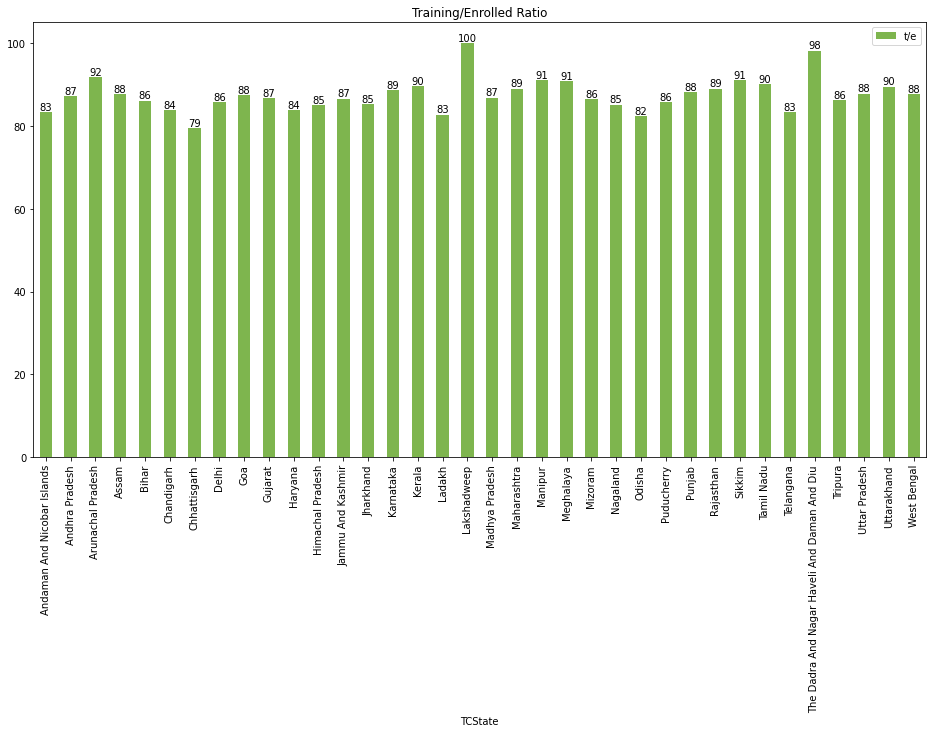

In [30]:
plt.figure(figsize=(16,8))
trabyenr_per_state_df = df.groupby("TCState").agg(np.mean)
trabyenr_per_state = trabyenr_per_state_df['t/e']
ax = trabyenr_per_state.plot(kind = "bar", y = "mean", legend =True,
            title = "Training/Enrolled Ratio",color='#7eb54e')

for i in ax.containers:
    ax.bar_label(i,fmt='%.0f')


print(df.groupby('TCState').mean().round()['t/e'].sort_values(ascending=False))

**Training by Enrolled Ratio is Maximum in Lakshwadeep and Minimum in Chattisgarh.**

In [31]:
df.head()

,Data Till,Scheme,Component,TrainingType,TCState,TCDistrict,Enrolled,Trained,Assessed,Certified,ReportedPlaced,t/e
0,21-04-2022,PMKVY 2.0,CSCM,RPL,Andaman And Nicobar Islands,Nicobars,46,46,46,46,0,100
1,21-04-2022,PMKVY 2.0,CSCM,RPL,Andaman And Nicobar Islands,South Andamans,10,10,6,6,0,100
2,21-04-2022,PMKVY 2.0,CSCM,STT,Andaman And Nicobar Islands,Nicobars,120,120,120,108,0,100
3,21-04-2022,PMKVY 2.0,CSSM,STT,Andaman And Nicobar Islands,Nicobars,156,156,78,57,0,100
4,21-04-2022,PMKVY 2.0,CSCM,STT,Andaman And Nicobar Islands,North And Middle Andaman,1041,870,861,839,124,83


In [32]:
df['c/t'] = 100 * df['Certified'] / df['Trained']

In [33]:
df[df['c/t'].isna()]

,Data Till,Scheme,Component,TrainingType,TCState,TCDistrict,Enrolled,Trained,Assessed,Certified,ReportedPlaced,t/e,c/t
10,21-04-2022,PMKVY 3.0,CSCM,STT,Andaman And Nicobar Islands,Nicobars,25,0,0,0,0,0,NaN
13,21-04-2022,PMKVY 3.0,CSCM,STT,Andaman And Nicobar Islands,South Andamans,147,0,0,0,0,0,NaN
28,21-04-2022,PMKVY 2.0,CSCM,SP,Andhra Pradesh,Chittoor,11,0,0,0,0,0,NaN
130,21-04-2022,PMKVY 3.0,CSCM,STT,Andhra Pradesh,Y.S.R,10,0,0,0,0,0,NaN
146,21-04-2022,PMKVY 2.0,CSCM,RPL,Arunachal Pradesh,Tawang,64,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4828,21-04-2022,PMKVY 3.0,CSSM,STT,Uttar Pradesh,Jaunpur,120,0,0,0,0,0,NaN
4849,21-04-2022,PMKVY 3.0,CSSM,STT,Uttar Pradesh,Mainpuri,30,0,0,0,0,0,NaN
4866,21-04-2022,PMKVY 3.0,CSSM,STT,Uttar Pradesh,Rampur,120,0,0,0,0,0,NaN
4880,21-04-2022,PMKVY 3.0,CSSM,STT,Uttar Pradesh,Sonbhadra,120,0,0,0,0,0,NaN


In [34]:
df['c/t'] =df['c/t'].fillna(0)

In [35]:
df.head()

,Data Till,Scheme,Component,TrainingType,TCState,TCDistrict,Enrolled,Trained,Assessed,Certified,ReportedPlaced,t/e,c/t
0,21-04-2022,PMKVY 2.0,CSCM,RPL,Andaman And Nicobar Islands,Nicobars,46,46,46,46,0,100,100.000000
1,21-04-2022,PMKVY 2.0,CSCM,RPL,Andaman And Nicobar Islands,South Andamans,10,10,6,6,0,100,60.000000
2,21-04-2022,PMKVY 2.0,CSCM,STT,Andaman And Nicobar Islands,Nicobars,120,120,120,108,0,100,90.000000
3,21-04-2022,PMKVY 2.0,CSSM,STT,Andaman And Nicobar Islands,Nicobars,156,156,78,57,0,100,36.538462
4,21-04-2022,PMKVY 2.0,CSCM,STT,Andaman And Nicobar Islands,North And Middle Andaman,1041,870,861,839,124,83,96.436782


TCState
The Dadra And Nagar Haveli And Daman And Diu    78.0
Chandigarh                                      75.0
Puducherry                                      71.0
Punjab                                          68.0
Rajasthan                                       67.0
Sikkim                                          67.0
Telangana                                       67.0
Meghalaya                                       66.0
Delhi                                           65.0
Gujarat                                         64.0
Himachal Pradesh                                64.0
Uttarakhand                                     64.0
Andhra Pradesh                                  63.0
Tamil Nadu                                      62.0
Karnataka                                       62.0
Mizoram                                         62.0
Manipur                                         62.0
Madhya Pradesh                                  61.0
Haryana                               

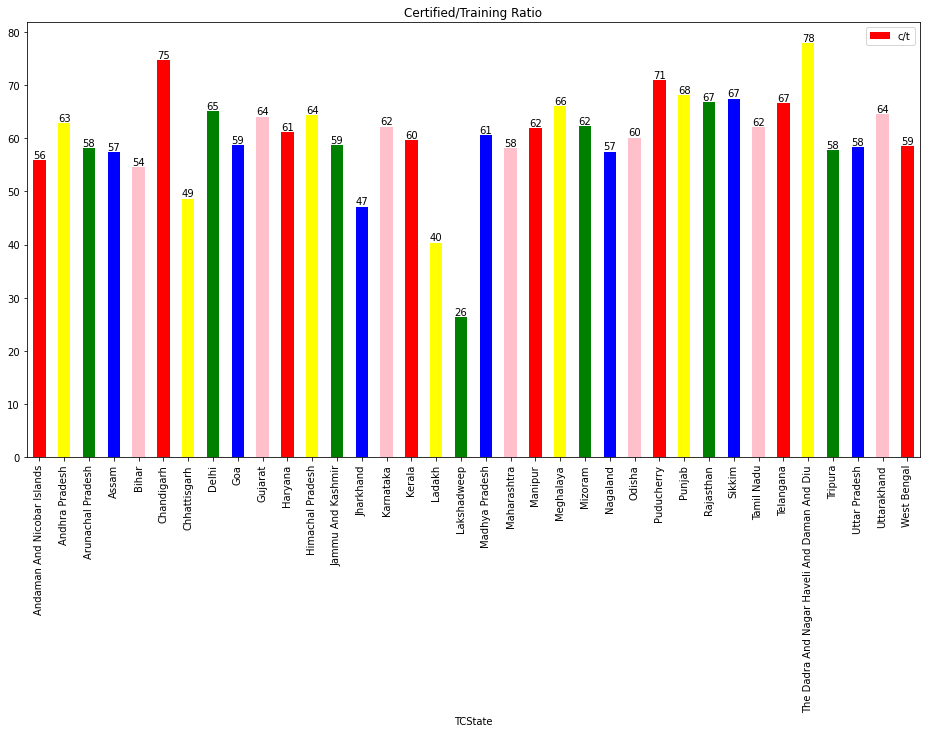

In [36]:
plt.figure(figsize=(16,8))
cerbytra_per_state_df = df.groupby("TCState").agg(np.mean)
cerbytra_per_state = cerbytra_per_state_df['c/t']
ax = cerbytra_per_state.plot(kind = "bar", y = "mean", legend =True,
            title = "Certified/Training Ratio",color=['red', 'yellow', 'green', 'blue', 'pink'])

for i in ax.containers:
    ax.bar_label(i,fmt='%.0f')

print(df.groupby('TCState').mean().round()['c/t'].sort_values(ascending=False))

**Certified by Training Ratio is maximum in The Dadra And Nagar Haveli And Daman And Diu and minimum in Lakshwadeep.**

In [37]:
df['p/t'] = 100 * df['ReportedPlaced'] / df['Trained']

In [38]:
df[df['p/t'].isna()]

,Data Till,Scheme,Component,TrainingType,TCState,TCDistrict,Enrolled,Trained,Assessed,Certified,ReportedPlaced,t/e,c/t,p/t
10,21-04-2022,PMKVY 3.0,CSCM,STT,Andaman And Nicobar Islands,Nicobars,25,0,0,0,0,0,0.0,NaN
13,21-04-2022,PMKVY 3.0,CSCM,STT,Andaman And Nicobar Islands,South Andamans,147,0,0,0,0,0,0.0,NaN
28,21-04-2022,PMKVY 2.0,CSCM,SP,Andhra Pradesh,Chittoor,11,0,0,0,0,0,0.0,NaN
130,21-04-2022,PMKVY 3.0,CSCM,STT,Andhra Pradesh,Y.S.R,10,0,0,0,0,0,0.0,NaN
146,21-04-2022,PMKVY 2.0,CSCM,RPL,Arunachal Pradesh,Tawang,64,0,0,0,0,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4828,21-04-2022,PMKVY 3.0,CSSM,STT,Uttar Pradesh,Jaunpur,120,0,0,0,0,0,0.0,NaN
4849,21-04-2022,PMKVY 3.0,CSSM,STT,Uttar Pradesh,Mainpuri,30,0,0,0,0,0,0.0,NaN
4866,21-04-2022,PMKVY 3.0,CSSM,STT,Uttar Pradesh,Rampur,120,0,0,0,0,0,0.0,NaN
4880,21-04-2022,PMKVY 3.0,CSSM,STT,Uttar Pradesh,Sonbhadra,120,0,0,0,0,0,0.0,NaN


In [39]:
df['p/t'] =df['p/t'].fillna(0)

In [40]:
df.head()

,Data Till,Scheme,Component,TrainingType,TCState,TCDistrict,Enrolled,Trained,Assessed,Certified,ReportedPlaced,t/e,c/t,p/t
0,21-04-2022,PMKVY 2.0,CSCM,RPL,Andaman And Nicobar Islands,Nicobars,46,46,46,46,0,100,100.000000,0.000000
1,21-04-2022,PMKVY 2.0,CSCM,RPL,Andaman And Nicobar Islands,South Andamans,10,10,6,6,0,100,60.000000,0.000000
2,21-04-2022,PMKVY 2.0,CSCM,STT,Andaman And Nicobar Islands,Nicobars,120,120,120,108,0,100,90.000000,0.000000
3,21-04-2022,PMKVY 2.0,CSSM,STT,Andaman And Nicobar Islands,Nicobars,156,156,78,57,0,100,36.538462,0.000000
4,21-04-2022,PMKVY 2.0,CSCM,STT,Andaman And Nicobar Islands,North And Middle Andaman,1041,870,861,839,124,83,96.436782,14.252874


TCState
Puducherry                                      26.0
Mizoram                                         24.0
The Dadra And Nagar Haveli And Daman And Diu    24.0
Punjab                                          23.0
Chandigarh                                      22.0
Tamil Nadu                                      21.0
Telangana                                       20.0
Andhra Pradesh                                  20.0
Meghalaya                                       19.0
Assam                                           19.0
Sikkim                                          18.0
Ladakh                                          18.0
Madhya Pradesh                                  17.0
Goa                                             16.0
Haryana                                         16.0
Uttarakhand                                     15.0
Delhi                                           14.0
Tripura                                         14.0
West Bengal                           

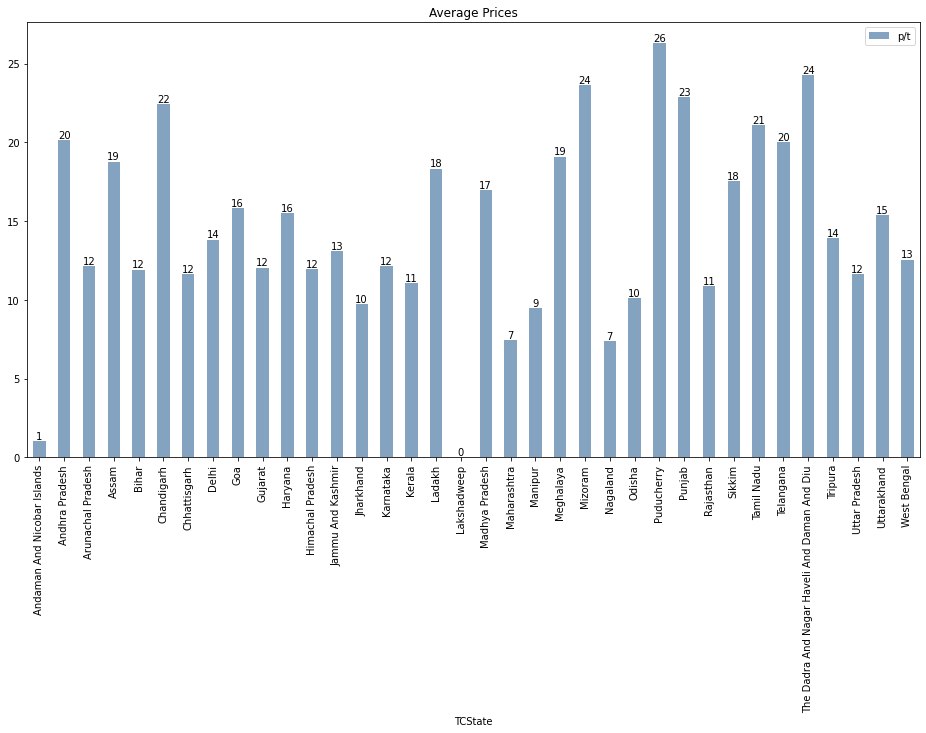

In [41]:
plt.figure(figsize=(16,8))
plabytra_per_state_df = df.groupby("TCState").agg(np.mean)
plabytra_per_state = plabytra_per_state_df['p/t']
ax=plabytra_per_state.plot(kind = "bar", y = "mean", legend =True,
            title = "Average Prices",color=(0.2, 0.4, 0.6, 0.6))

for i in ax.containers:
    ax.bar_label(i,fmt='%.0f')


df.groupby('TCState').mean().round()['p/t'].sort_values(ascending=False)

**Placed by Training Ratio is maximum in Puducherry and minimum in Lakshwadeep.**

In [42]:
df8['tp/te'] = 100 * df8['TotalReported_Placed'] / df8['TotalEnrolled']

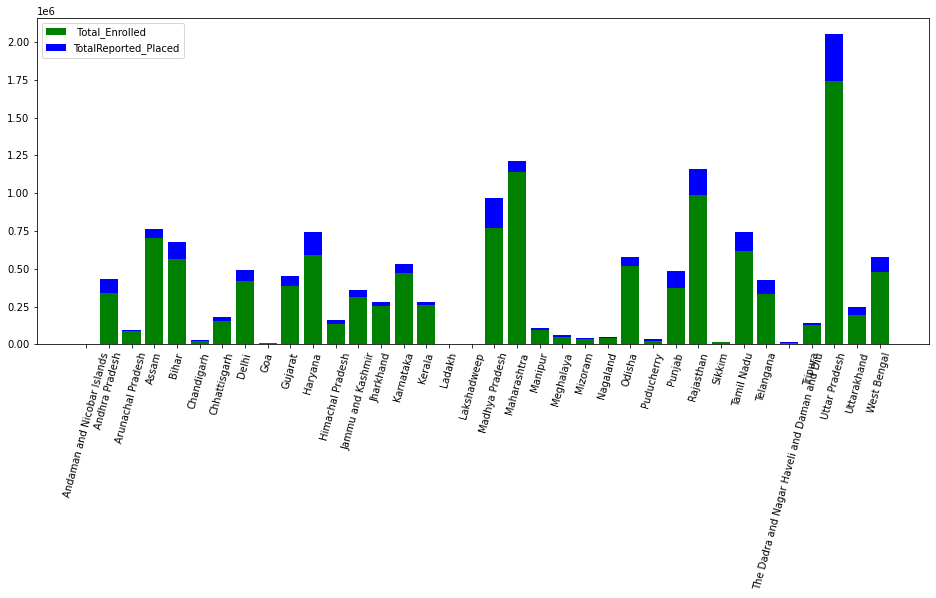

TCState
Puducherry                                      40.0
Punjab                                          32.0
Mizoram                                         29.0
Telangana                                       28.0
Ladakh                                          27.0
Sikkim                                          27.0
Andhra Pradesh                                  27.0
Uttarakhand                                     26.0
The Dadra and Nagar Haveli and Daman and Diu    26.0
Madhya Pradesh                                  25.0
Chandigarh                                      25.0
Haryana                                         25.0
Meghalaya                                       25.0
West Bengal                                     21.0
Bihar                                           20.0
Tamil Nadu                                      20.0
Uttar Pradesh                                   18.0
Himachal Pradesh                                18.0
Jammu and Kashmir                     

In [43]:
plt.figure(figsize=(16,6))
TCState=df8['TCState']
Total_Enrolled = df8['TotalEnrolled']
TotalReported_Placed = df8['TotalReported_Placed']

plt.xticks(rotation = 75)
plt.bar(TCState, Total_Enrolled, color='g')
plt.bar(TCState, TotalReported_Placed, bottom=Total_Enrolled, color='b')


plt.legend([" Total_Enrolled", "TotalReported_Placed"])
  
plt.show()


df8.groupby('TCState').mean().round()['tp/te'].sort_values(ascending=False)

In [44]:
df3 = df.groupby('TCState').mean().round()[['Enrolled', 'Trained', 'Assessed', 'Certified','ReportedPlaced']]

<AxesSubplot:xlabel='TCState'>

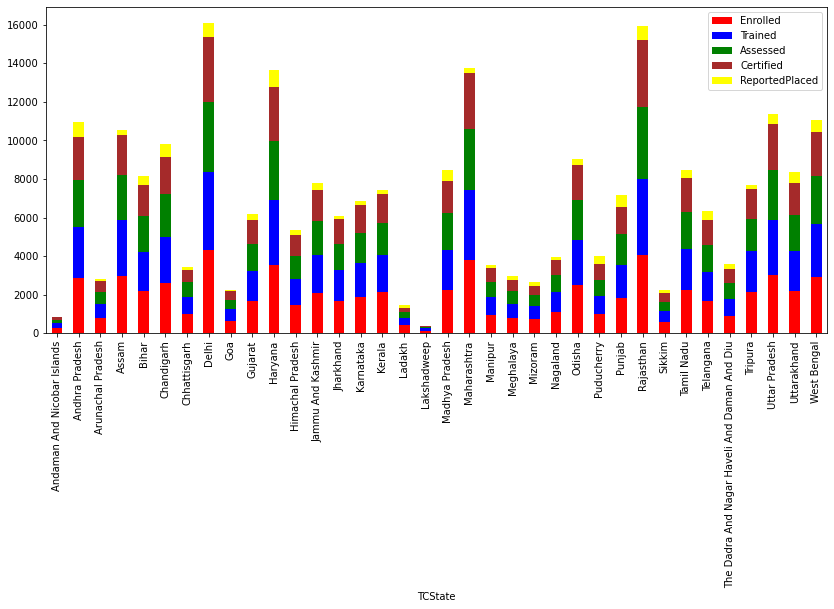

In [45]:
df3.plot(kind='bar',stacked=True,color=['red','blue','green','brown','yellow'],figsize=(14,6))

In [1]:
pwd

'C:\\Users\\GHAGHRE\\Desktop'